106
159.36381324734663


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1a66d391970>)

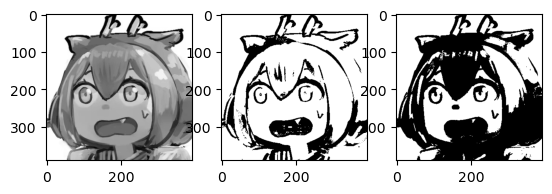

In [22]:
#用matlab或python语言实现大津法和迭代法阈值分割，并实验比较两者的性能差别
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread('touxiang.jpg',0)
# 初始化参数
threshold = np.mean(img)
diff = 1
epsilon = 0.01

# 迭代计算阈值
while diff > epsilon:
    # 计算前景和背景的平均灰度值
    fg = img[img >= threshold]
    bg = img[img < threshold]
    mu_fg, mu_bg = np.mean(fg), np.mean(bg)
    
    # 更新阈值
    new_threshold = (mu_fg + mu_bg) / 2
    
    # 计算阈值的差异
    diff = abs(threshold - new_threshold)
    threshold = new_threshold

# 使用迭代法进行阈值分割

diedai = np.zeros_like(img)
diedai[img > threshold] = 255

 
def OTSU(img_array):            #传入的参数为ndarray形式
	height = img_array.shape[0]
	width = img_array.shape[1]
	count_pixel = np.zeros(256)
 
	for i in range(height):
		for j in range(width):
			count_pixel[int(img_array[i][j])] += 1 

	max_variance = 0.0
	best_thresold = 0
	for thresold in range(256):
		n0 = count_pixel[:thresold].sum()
		n1 = count_pixel[thresold:].sum()
		w0 = n0 / (height * width)
		w1 = n1 / (height * width)
		u0 = 0.0
		u1 = 0.0
		
		for i in range(thresold):
			u0 += i * count_pixel[i]
		for j in range(thresold, 256):
			u1 += j * count_pixel[j]
		
		u = u0 * w0 + u1 * w1 
		tmp_var = w0 * np.power((u - u0), 2) + w1 * np.power((u - u1), 2)
 
		if tmp_var > max_variance:
			best_thresold = thresold
			max_variance = tmp_var
 
	return best_thresold

optimal_t = OTSU(img)
OTSU1 = np.zeros_like(img)
OTSU1 [img > optimal_t] = 255

print(optimal_t)
print(threshold)

plt.subplot(131), plt.imshow(img, 'gray')
plt.subplot(132), plt.imshow(OTSU1, 'gray')
plt.subplot(133), plt.imshow(diedai, 'gray')
